In [33]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("Brent") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel



In [3]:
spot = df1["LCOc1"]
spot = np.log(spot)
spot = spot.loc['2004-01-31':'2022-11-30']
spot_train = spot.loc[:'2016-07-31']
#spot_train.plot()

In [4]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=(spot_train.shape[0]))
#train, test = model_selection.train_test_split(data, train_size=(spot.shape[0]-1))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-290.839, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-286.936, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-295.028, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-292.546, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-288.825, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-296.957, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-295.030, Time=0.12 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-293.018, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-295.860, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-295.455, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-294.381, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-296.687, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=-298.902, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-296.973, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1

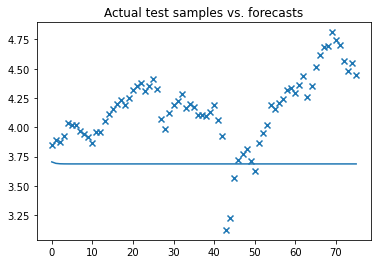

In [5]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [6]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 151.451
Date:                Sun, 08 Jan 2023   AIC                           -298.902
Time:                        09:09:05   BIC                           -292.881
Sample:                             0   HQIC                          -296.456
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2807      0.075      3.757      0.000       0.134       0.427
sigma2         0.0078      0.001     10.617      0.000       0.006       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                14.59
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.37
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
model = ARIMA(spot_train, order=(1,1,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  LCOc1   No. Observations:                  151
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 151.451
Date:                Sun, 08 Jan 2023   AIC                           -298.902
Time:                        17:10:22   BIC                           -292.881
Sample:                    01-31-2004   HQIC                          -296.456
                         - 07-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2807      0.075      3.757      0.000       0.134       0.427
sigma2         0.0078      0.001     10.617      0.000       0.006       0.009
Ljung-Box (L1) (Q):                   0.08   Jarque-

c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [11]:
#plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [12]:
#arima.predict(n_periods=test.shape[0])

In [7]:
ar = pm.AutoARIMA()
ar.fit(spot_train)
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 151.451
Date:                Sun, 08 Jan 2023   AIC                           -298.902
Time:                        11:20:02   BIC                           -292.881
Sample:                    01-31-2004   HQIC                          -296.456
                         - 07-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2807      0.075      3.757      0.000       0.134       0.427
sigma2         0.0078      0.001     10.617      0.000       0.006       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                14.59
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.37
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
#res= pm.arima.decompose(spot_train[:-1], type_='multiplicative', m=12)

#decomposition = sm.tsa.seasonal_decompose(spot_train, model = 'additive')
#decomposition.plot()

In [13]:
spot2 = spot.diff()
#spot2 = spot.diff()
spot_train2 = spot2.loc[:'2016-07-31'].dropna()
#spot_train2.plot()

In [14]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=(spot_train2.shape[0]))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-296.359, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-288.825, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-298.902, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-296.306, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-297.814, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-297.394, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-287.640, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-296.957, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.179 seconds


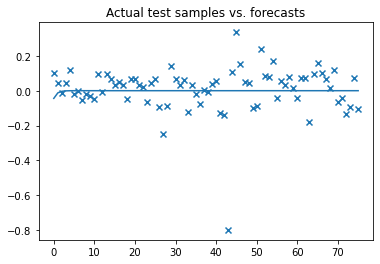

In [15]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [16]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 151.451
Date:                Sun, 08 Jan 2023   AIC                           -298.902
Time:                        11:38:11   BIC                           -292.881
Sample:                             0   HQIC                          -296.456
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2807      0.075      3.757      0.000       0.134       0.427
sigma2         0.0078      0.001     10.617      0.000       0.006       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                14.59
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.37
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
#plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [20]:
#tests = arima2.predict(n_periods=test2.shape[0])
#tests

In [21]:
#cum_res = np.exp(tests.cumsum())*spot.iloc[(spot.shape[0]*2//3)-1]
#plt.figure(figsize=(10,5))
#plt.plot(cum_res, color='g',label = 'NAV Returns')
#plt.legend()
#plt.show()

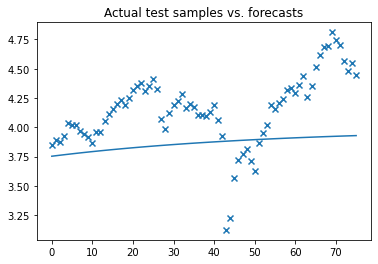

In [22]:
data3 = np.array(spot.dropna())
train3, test3 = model_selection.train_test_split(data3, train_size=(data3.shape[0]*2//3))
#arima3 = pm.decompose(data3, type_='additive', m=10 )
#pm.utils.visualization.decomposed_plot(arima3)
#arima3
arima3 = pm.arima.ARIMA(order=(1,0,0),with_intercept=True)
arima3.fit(train3)
arima3.predict(n_periods=20)

x3 = np.arange(test3.shape[0])
plt.scatter(x3, test3, marker='x')
plt.plot(x3, arima3.predict(n_periods=test3.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [42]:
arima3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -505.540
Date:                Sat, 31 Dec 2022   AIC                           1017.079
Time:                        09:04:27   BIC                           1026.131
Sample:                             0   HQIC                          1020.757
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6217      1.447      1.121      0.262      -1.215       4.458
ar.L1          0.9747      0.018     53.975      0.000       0.939       1.010
sigma2        46.4377      3.805     12.206      0.000      38.981      53.895
===================================================================================
Ljung-Box (L1) (Q):                  15.82   Jarque-Bera (JB):                59.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.80
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

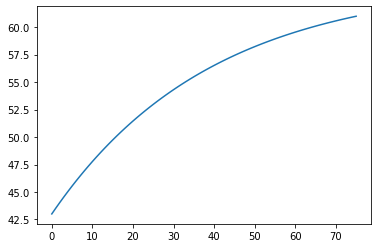

In [43]:
plt.plot(arima3.predict(n_periods=test3.shape[0]))

In [44]:
arima3.predict(n_periods=20)

array([43.00684891, 43.53985485, 44.05936824, 44.56573063, 45.05927493,
       45.54032561, 46.00919894, 46.46620319, 46.91163879, 47.34579861,
       47.76896808, 48.1814254 , 48.58344176, 48.97528144, 49.35720207,
       49.72945473, 50.09228416, 50.4459289 , 50.79062146, 51.12658844])

In [28]:
#cointegration tests

#normalized cv
#LR test

In [29]:
#correlaatiomatriisi

In [30]:
#np.argwhere(np.isnan(x))

In [ ]:
#From TDS Medium:

train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)